<a href="https://colab.research.google.com/github/morekaccino/EECS6322-Course-Project/blob/main/small_model_lr_1e-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)
tf.config.experimental.set_memory_growth(physical_devices[0], True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
with zipfile.ZipFile("drive/MyDrive/todel/dataset_primary.zip", 'r') as zip_ref:
    zip_ref.extractall("drive/MyDrive/todel/dataset_primary")


In [4]:
path = "drive/MyDrive/todel/dataset_primary/data_05S01/"
no_attack_dir = os.listdir(path + "0/")
attack_dir = os.listdir(path + "1/")

In [5]:
# Load the images and labels into memory
images = []
labels = []
for filename in no_attack_dir:
    img = tf.keras.preprocessing.image.load_img(
        path + "0/" + filename, target_size=(224, 224)
    )
    img = tf.keras.preprocessing.image.img_to_array(img)
    images.append(img)
    labels.append(0)
for filename in attack_dir:
    img = tf.keras.preprocessing.image.load_img(
        path + "1/" + filename, target_size=(224, 224)
    )
    img = tf.keras.preprocessing.image.img_to_array(img)
    images.append(img)
    labels.append(1)
images = np.array(images)
labels = np.array(labels)

del no_attack_dir
del attack_dir

In [6]:
labels = tf.keras.utils.to_categorical(labels, 2)
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [7]:
# Shuffle the data and split into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42
)
del images
del labels

In [9]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 16)      2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 16)        2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 16)      

In [10]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [11]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
)

Epoch 1/10
138/138 [==============================] - 20s 44ms/step - loss: 0.0090 - accuracy: 0.9995 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
138/138 [==============================] - 4s 29ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
138/138 [==============================] - 5s 35ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
138/138 [==============================] - 4s 31ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
138/138 [==============================] - 5s 38ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
138/138 [==============================] - 5s 32ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
138/138 [==============================] - 4s 32ms/step - loss: 0.0000e+00 - accuracy:

In [12]:
model.save("model_05S01.h5")

Text(0, 0.5, 'Accuracy')

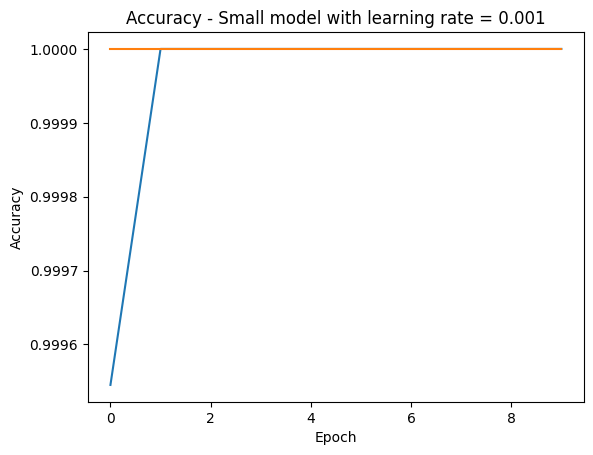

In [22]:
# Plot the training and validation accuracy and loss at each epoch
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))
plt.plot(epochs, acc, label='Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')

plt.title("Accuracy - Small model with learning rate = 0.001")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")